# Proyecto Individual 02

Rol a desarrollar

Importamos librerias necesarias

In [21]:
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Primero, necesitamos obtener los datos del mercado bursátil del índice SP500. Podemos utilizar la API de Yahoo Finance para obtener los precios históricos de las acciones de las empresas del SP500.

In [32]:
sp500_data = yf.download('^GSPC', start='2000-01-01', end='2023-02-23')


[*********************100%***********************]  1 of 1 completed


Guardar los datos en un archivo csv

In [35]:
sp500_data.to_csv('SP500.csv')

Ahora que tenemos los datos, es importante realizar un análisis exploratorio para entenderlos mejor. El objetivo es entender las características de los datos y encontrar patrones y relaciones entre ellos.

In [2]:
# Leer el archivo CSV
df_sp500 = pd.read_csv('./SP500.csv')

En primer lugar, vamos a ver cómo se ven los datos utilizando la función **head()**:

In [3]:
df_sp500.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
1,2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2,2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
3,2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
4,2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000


Se muestran los primeros registros del DataFrame. Podemos ver que la información incluye los precios de apertura, cierre, máximo, mínimo, volumen y precios ajustados de las acciones en sus respectivas fechas.

Para que la visualizacion sea mas facil de leer y comprender se realizaran los siguientes cambios

In [4]:
# renombramos las columnas al español
df_sp500 = df_sp500.rename(columns={
    'Date': 'Fecha',
    'Open': 'Apertura',
    'High': 'Máximo',
    'Low': 'Mínimo',
    'Close': 'Cierre',
    'Adj Close': 'Cierre Ajustado',
    'Volume': 'Volumen'
})

In [5]:
# redondear a 2 decimales
df_sp500 = df_sp500.round(2)

In [6]:
df_sp500

,Fecha,Apertura,Máximo,Mínimo,Cierre,Cierre Ajustado,Volumen
0,2000-01-03,1469.25,1478.00,1438.36,1455.22,1455.22,931800000
1,2000-01-04,1455.22,1455.22,1397.43,1399.42,1399.42,1009000000
2,2000-01-05,1399.42,1413.27,1377.68,1402.11,1402.11,1085500000
3,2000-01-06,1402.11,1411.90,1392.10,1403.45,1403.45,1092300000
4,2000-01-07,1403.45,1441.47,1400.73,1441.47,1441.47,1225200000
...,...,...,...,...,...,...,...
5817,2023-02-15,4119.50,4148.11,4103.98,4147.60,4147.60,4075980000
5818,2023-02-16,4114.75,4136.54,4089.49,4090.41,4090.41,4143660000
5819,2023-02-17,4077.39,4081.51,4047.95,4079.09,4079.09,4045480000
5820,2023-02-21,4052.35,4052.35,3995.19,3997.34,3997.34,4121590000


Podemos obtener más información del DataFrame utilizando la función **info()**:

In [7]:
df_sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Fecha            5822 non-null   object 
 1   Apertura         5822 non-null   float64
 2   Máximo           5822 non-null   float64
 3   Mínimo           5822 non-null   float64
 4   Cierre           5822 non-null   float64
 5   Cierre Ajustado  5822 non-null   float64
 6   Volumen          5822 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 318.5+ KB


Esta función nos muestra información sobre el tamaño del DataFrame, el tipo de datos de cada columna, la cantidad de valores no nulos y el uso de memoria.

Ahora, vamos a calcular algunas estadísticas descriptivas para tener una idea general de los datos:

In [8]:
df_sp500.describe().round(2)

,Apertura,Máximo,Mínimo,Cierre,Cierre Ajustado,Volumen
count,5822.00,5822.00,5822.00,5822.00,5822.00,5.822000e+03
mean,1886.49,1897.78,1874.26,1886.71,1886.71,3.302644e+09
std,976.76,981.89,971.19,976.89,976.89,1.522890e+09
min,679.28,695.27,666.79,676.53,676.53,3.560700e+08
25%,1184.60,1191.76,1177.14,1184.42,1184.42,1.985738e+09
50%,1434.52,1443.68,1425.54,1434.43,1434.43,3.408845e+09
75%,2390.74,2395.65,2380.30,2389.33,2389.33,4.159688e+09
max,4804.51,4818.62,4780.04,4796.56,4796.56,1.145623e+10


Esta función nos mostrará la cantidad de registros, la media, la desviación estándar, los valores mínimos y máximos y los cuartiles de cada columna del DataFrame.

Como se van a realizar operaciones que implican seleccionar, filtrar o agrupar datos según la fecha, se indexara la columna **'fecha'**

In [14]:
df_sp500 = df_sp500.set_index('Fecha')

#se convierten la columna con to_datetime
df_sp500.index = pd.to_datetime(df_sp500.index)

El precio de **cierre ajustado** tiene en cuenta cualquier evento corporativo que pueda afectar el precio de una acción o de un índice. Por ejemplo, las divisiones de acciones, las fusiones o las adquisiciones pueden afectar el precio de una acción o de un índice. El precio de cierre ajustado se calcula teniendo en cuenta estos eventos corporativos.

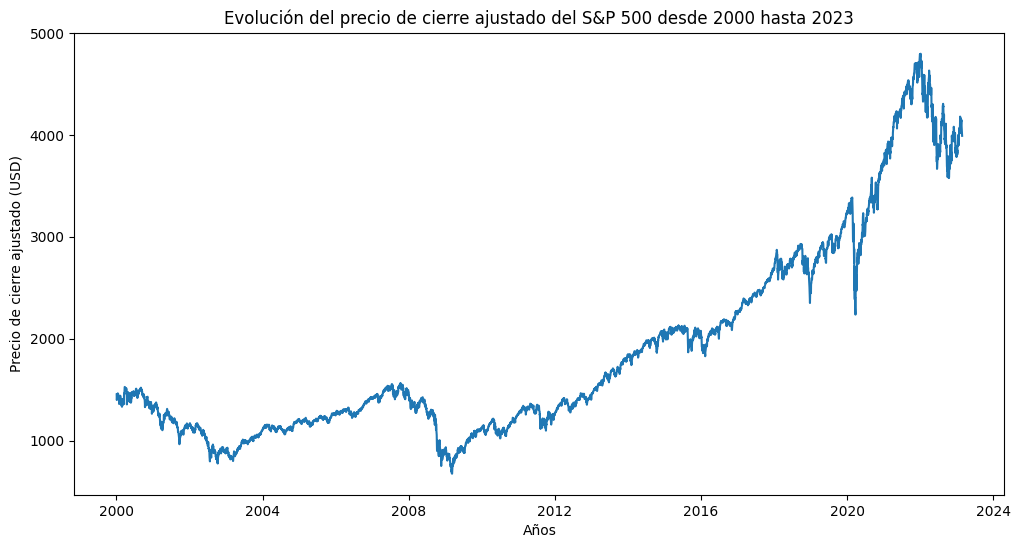

In [31]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df_sp500.index, y=df_sp500['Cierre Ajustado'])
plt.title('Evolución del precio de cierre ajustado del S&P 500 desde 2000 hasta 2023')
plt.xlabel('Años')
plt.ylabel('Precio de cierre ajustado (USD)')
plt.show()

Esta gráfica nos muestra la evolución del precio de cierre ajustado del S&P 500 a lo largo del tiempo, lo cual nos permite visualizar tendencias a largo plazo y posibles patrones.

Graficamos un histograma de los rendimientos diarios del S&P 500:

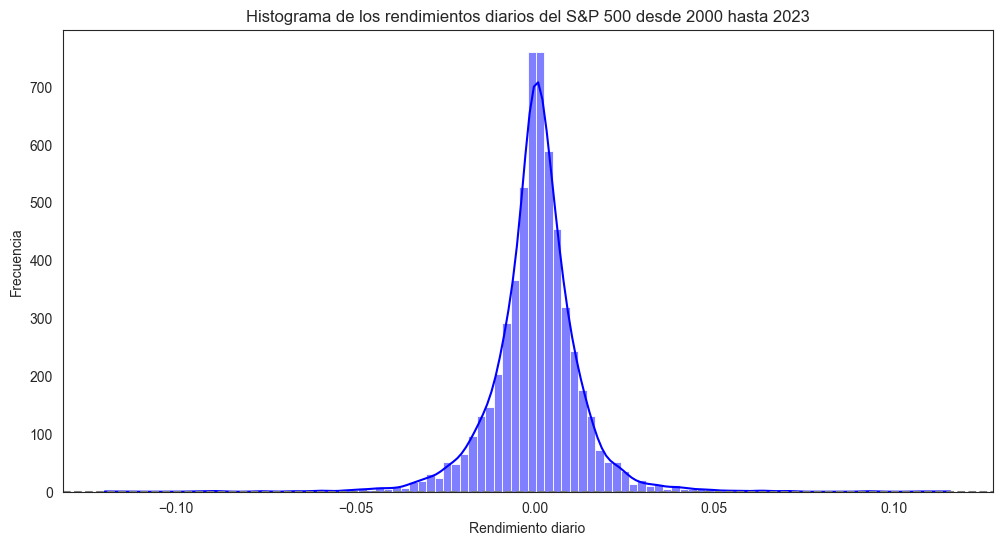

In [37]:
daily_returns = df_sp500['Cierre'].pct_change()
plt.figure(figsize=(12,6))
sns.histplot(daily_returns.dropna(), kde=True, bins=100, color='blue')
plt.title('Histograma de los rendimientos diarios del S&P 500 desde 2000 hasta 2023')
plt.xlabel('Rendimiento diario')
plt.ylabel('Frecuencia')
plt.show()

Esta gráfica nos muestra la distribución de los rendimientos diarios del S&P 500, lo cual nos permite analizar la volatilidad y riesgo del índice

Graficar un diagrama de caja de los rendimientos mensuales del S&P 500:

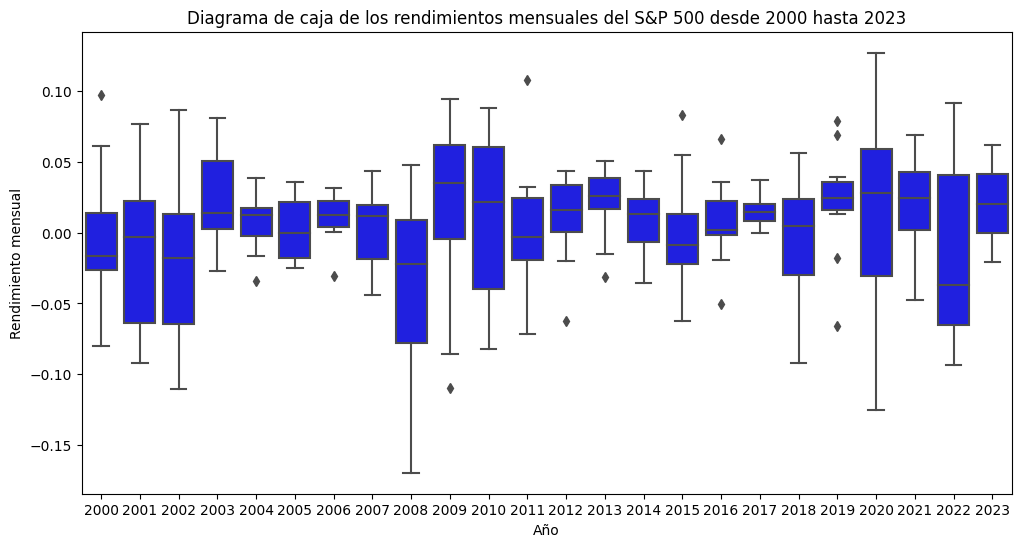

In [26]:
monthly_returns = df_sp500['Cierre'].resample('M').ffill().pct_change()
plt.figure(figsize=(12,6))
sns.boxplot(x=monthly_returns.index.year, y=monthly_returns, color='blue')
plt.title('Diagrama de caja de los rendimientos mensuales del S&P 500 desde 2000 hasta 2023')
plt.xlabel('Año')
plt.ylabel('Rendimiento mensual')
plt.show()

Para encontrar los valores atípicos en los rendimientos mensuales del S&P 500 hacemos lo siguiente

In [38]:
monthly_returns = df_sp500['Cierre'].resample('M').ffill().pct_change()

Q1 = monthly_returns.quantile(0.25)
Q3 = monthly_returns.quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = monthly_returns[(monthly_returns < lower_limit) | (monthly_returns > upper_limit)]
print(outliers)

Fecha
2002-09-30   -0.110024
2008-10-31   -0.169425
2009-02-28   -0.109931
2011-10-31    0.107723
2020-03-31   -0.125119
2020-04-30    0.126844
2020-11-30    0.107546
Name: Cierre, dtype: float64


Estos son los valores atípicos de los rendimientos mensuales del S&P 500. Los valores que aparecen en negativo indican que esos meses tuvieron rendimientos muy por debajo del promedio, mientras que los valores positivos indican que esos meses tuvieron rendimientos muy por encima del promedio

In [49]:
# Descargar el índice S&P500
tickers = yf.Tickers("^GSPC")
sp500 = tickers.history(start='2000-01-01', end='2023-02-23', actions=False)

# Calcular el promedio del cierre ajustado de todas las empresas en el S&P500
promedio = sp500['Adj Close'].mean()

# Descargar los datos de cierre ajustado de todas las empresas en el S&P500
empresas = yf.download("^GSPC", start="2000-01-01", end="2023-02-23")['Adj Close']

# Seleccionar las empresas cuyo cierre ajustado es mayor que el promedio
empresas_arriba_promedio = empresas.loc[:, (empresas > promedio).any()]

# Mostrar las empresas cuyo cierre ajustado es mayor que el promedio
print("Promedio del cierre ajustado de todas las empresas en el S&P500:", promedio)
print("Empresas cuyo cierre ajustado es mayor que el promedio:")
print(empresas_arriba_promedio.columns.values)

[*********************100%***********************]  1 of 1 completed


KeyError: '^GSPC'

In [48]:
# Calcular la tasa de rendimiento diaria
daily_returns = df_sp500['Cierre Ajustado'].pct_change()

# Calcular la volatilidad anualizada
volatility = daily_returns.std() * (252 ** 0.5)

# Calcular el rendimiento anualizado
annual_return = (1 + daily_returns.mean()) ** 252 - 1

# Calcular el perfil de riesgo
risk_profile = annual_return / volatility

# Imprimir los resultados
print("Volatilidad anualizada:", volatility)
print("Rendimiento anualizado:", annual_return)
print("Perfil de riesgo:", risk_profile)

Volatilidad anualizada: 0.19836753921112588
Rendimiento anualizado: 0.06543486054056058
Perfil de riesgo: 0.3298667755862877


Volatilidad anualizada: 0.19836753921112588

Esta métrica se refiere a la medida de la variabilidad de los precios del índice S&P 500. En este caso, la volatilidad anualizada es de aproximadamente el 19.8%, lo que significa que los precios del índice pueden variar hasta un 19.8% en promedio en cualquier dirección durante un período de un año. La volatilidad es una medida importante del riesgo en una inversión, ya que indica la incertidumbre que puede experimentar un inversor en términos de fluctuaciones de precios.
Rendimiento anualizado: 0.06543486054056058

Esta métrica se refiere a la tasa de retorno promedio del índice S&P 500 durante un período de un año. En este caso, el rendimiento anualizado es de aproximadamente el 6.5%, lo que significa que en promedio, el índice ha generado un retorno del 6.5% por año durante el período analizado. Esta métrica es importante para los inversores, ya que indica la capacidad del índice para generar retornos para los inversores.
Perfil de riesgo: 0.3298667755862877

Esta métrica se refiere al índice de Sharpe, que es una medida del rendimiento ajustado al riesgo de una inversión. En este caso, el perfil de riesgo es de aproximadamente 0.33, lo que indica que el rendimiento del índice en relación con el riesgo que asume (medido por la volatilidad) es relativamente bajo. Esto sugiere que el índice S&P 500 tiene un perfil de riesgo favorable en comparación con otros activos de riesgo similares y puede ser una inversión atractiva para los inversores que buscan obtener una rentabilidad ajustada al riesgo adecuada.


**COMPARAR LSO RESULTAFOS**
Sí, es cierto. El gráfico 4 muestra la volatilidad diaria del índice S&P 500, mientras que el cálculo que hicimos representa la volatilidad anualizada del índice. El gráfico 5 muestra el rendimiento diario del índice, mientras que el cálculo que hicimos representa el rendimiento anualizado del índice. Y el gráfico 6 muestra la relación entre el rendimiento y la volatilidad del índice, lo que nos da una idea del perfil de riesgo del mismo, que es precisamente lo que calculamos en la tercera métrica.

En resumen, los cálculos que hicimos son una forma de cuantificar y resumir la información que se muestra en los gráficos. Esto es útil porque nos permite comparar fácilmente el rendimiento, la volatilidad y el perfil de riesgo del índice con otros índices o activos financieros. Además, estos cálculos son más precisos que simplemente mirar los gráficos y hacer una estimación visual de la volatilidad o el rendimiento anualizado.